In [1]:
import pandas as pd
import numpy as np
Big_df = pd.read_csv('Twint_Data/ParallelProcessing/IRA_ScreenNames.csv', engine = 'python')
print(Big_df.shape)

(3479, 1)


In [2]:
Big_df.columns

Index(['screen_names'], dtype='object')

In [3]:
ira_Usernames = list(Big_df['screen_names'])
unique_IRA_Usernames = set(ira_Usernames)

In [4]:
len(unique_IRA_Usernames)

3479

In [5]:
import os
Allfilenames=[]
for file in os.listdir("Twint_Data/ParallelProcessing/Famous_Users/User_Data/tweetOnly_files/"):
    if file.endswith(".csv"):
        Allfilenames.append(file)
for i in range(1,21):
    if i < 10:
        number = '0'+str(i)
    else:
        number = str(i)
    for file in os.listdir("Twint_Data/ParallelProcessing/Famous_Users/User_Data/all_tweets_" + number + "/"):
        if file.endswith(".csv"):
            Allfilenames.append(file)
            
    print(i)
        
print(len(Allfilenames))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
5712


In [6]:
Allfilenames[:5]

['creynoldsnc_tweet_only.csv',
 'BuzzFeedVideo_tweet_only.csv',
 'iowahawkblog_tweet_only.csv',
 'GmoneyRainmaker_tweet_only.csv',
 'komandnaya_tweet_only.csv']

In [12]:
userDF = pd.read_csv("Twint_Data/ParallelProcessing/Famous_Users/User_Data/tweetOnly_files/"+Allfilenames[800],engine = 'python')

In [13]:
userDF.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [14]:
userDF['mentions'][:50]

0                                        ['kotohontas']
1                           ['imnomber1', 'den_muller']
2           ['po_ming', 'speed_shit', 'anastasiafrost']
3                        ['poopygangsta', 'den_muller']
4     ['vsevolodthekind', 'g_o_n_z_o', 'zalton', 'ib...
5                 ['yuliya_di_', 'opasonya', 'tyttaya']
6                               ['opasonya', 'tyttaya']
7                      ['speed_shit', 'anastasiafrost']
8                               ['opasonya', 'tyttaya']
9                               ['tyttaya', 'opasonya']
10                 ['blinov234roman', 'anastasiafrost']
11                                       ['reddogfoto']
12                 ['blinov234roman', 'anastasiafrost']
13          ['anastasiafrost', 'aapofeoz', '__asha___']
14          ['anastasiafrost', 'aapofeoz', '__asha___']
15                 ['blinov234roman', 'anastasiafrost']
16                          ['red_light__', 'opasonya']
17          ['anastasiafrost', 'aapofeoz', '__as

In [15]:
# Remove the bots

print("Number of usernames to scrape before bot filtering = ", len(Allfilenames))
file2 = open("Twint_Data/ParallelProcessing/Famous_Users/botometer_removed_users.txt","r+")  
bot_List = file2.readlines()
print("Number of bots = ", len(bot_List))
print("Removed users ------")
for botname in bot_List:
    botname = botname.strip()
    #full_name = name+"_tweet_only.csv"
    #print(botname)
    if botname+'_tweet_only.csv' in Allfilenames:
        print(botname)
        Allfilenames.remove(botname+'_tweet_only.csv')

print("Number of usernames to scrape after bot filtering = ", len(Allfilenames))
#print(read_csv)


Number of usernames to scrape before bot filtering =  5712
Number of bots =  182
Removed users ------
Number of usernames to scrape after bot filtering =  5712


In [16]:
## - Sanity check
## This means our bot removal before starting scraping was correct.

In [18]:
mentionback_UserCount = 0
mentionBack_usernames = []
didNotMentionBack_usernames = []
count = 0
for eachuser in Allfilenames:
    try:
        userDF = pd.read_csv("Twint_Data/ParallelProcessing/Famous_Users/User_Data/tweetOnly_files/"+eachuser,engine = 'c',low_memory=False)
    except Exception as e:
        print(e)
        count +=1
        continue
        
    userMentions_ListOfStrings = list(userDF['mentions'])
    flag = 0
    for eachstring in userMentions_ListOfStrings:
        mentioned_usernames = eachstring.split("', '")
        #print(mentioned_usernames)
        mentioned_usernames[0] = mentioned_usernames[0][2:]
        mentioned_usernames[-1] = mentioned_usernames[-1][:-2]
#         print(mentioned_usernames)
#         print(len(mentioned_usernames))
#         print()

        if flag == 1:
            break
        if mentioned_usernames[0] != '':
            for eachmention in mentioned_usernames:
                if eachmention in unique_IRA_Usernames:
                    flag = 1
                    #print(eachuser)
                    mentionback_UserCount += 1
                    break
    if flag == 1:
        mentionBack_usernames.append(eachuser[:-15])
    else:
        didNotMentionBack_usernames.append(eachuser[:-15])
                
print(mentionback_UserCount)   
print(len(Allfilenames))
print(count)

Error tokenizing data. C error: EOF inside string starting at row 4703
Error tokenizing data. C error: Expected 34 fields in line 228065, saw 44

Error tokenizing data. C error: Expected 34 fields in line 20140, saw 44

[Errno 2] File b'Twint_Data/ParallelProcessing/Famous_Users/User_Data/tweetOnly_files/SurlyAmy_tweet_only.csv' does not exist: b'Twint_Data/ParallelProcessing/Famous_Users/User_Data/tweetOnly_files/SurlyAmy_tweet_only.csv'
Error tokenizing data. C error: Expected 34 fields in line 18044, saw 44

[Errno 2] File b'Twint_Data/ParallelProcessing/Famous_Users/User_Data/tweetOnly_files/haaretzcom_tweet_only.csv' does not exist: b'Twint_Data/ParallelProcessing/Famous_Users/User_Data/tweetOnly_files/haaretzcom_tweet_only.csv'
No columns to parse from file
Error tokenizing data. C error: Expected 34 fields in line 10432, saw 41

Error tokenizing data. C error: Expected 34 fields in line 3849, saw 42

No columns to parse from file
Error tokenizing data. C error: Expected 34 field

In [ ]:
## Takes half an hour to complete scanning 3000 users.

In [19]:
1054/(5712-17) # what fraction responded back?

0.18507462686567164

In [20]:
mentionedback = pd.DataFrame()
mentionedback['Mentionedback Usernames'] = list(mentionBack_usernames)
mentionedback.to_csv("Twint_Data/ParallelProcessing/Famous_Users/mentionedBack_users.csv",index = False)

In [21]:
didNotMentionback = pd.DataFrame()
didNotMentionback['DidnotMentionBack Usernames'] = list(didNotMentionBack_usernames)
didNotMentionback.to_csv("Twint_Data/ParallelProcessing/Famous_Users/didNotMentionBack_users.csv",index = False)

### FollowerCount of the scraped famous users

In [2]:
import pandas as pd
mentioned_df = pd.read_csv('Twint_Data/ParallelProcessing/Famous_Users/mentionedBack_users.csv')
mentionedbackUsers = list(mentioned_df['Mentionedback Usernames'])
print(len(mentionedbackUsers))

329


In [3]:
import tweepy
from time import sleep

consumer_key = 'kMPfqOqXWP1BO9uJJtwLJT7Iy'
consumer_secret = 'MkvtA3ZN55OwQ80ZFWgUGJ0gTqKbVv4bk3Z2npz7QLXk2V4osX'
access_token = '1208955205032632328-Xa3ZI96nAeYfUU5SV9xjY6RT8qWGFA'
access_token_secret = 'jYo2BNrkmle2NiXSdGo2fZvroZJTVGzimaBClNCSYSNLI'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [4]:
import time
Allfilenames = mentionedbackUsers
FollowerCounts = []
TotalTweetCounts = []
i = 0
while i < len(Allfilenames):
    try:
        u = api.get_user(Allfilenames[i])
        TotalTweetCounts.append(api.get_user(str(Allfilenames[i])).statuses_count)
        FollowerCounts.append(u.followers_count)
#             if u.followers_count <= 5000:
#                 UserNames_filtered.append(u.screen_name)
#             print(u.screen_name)
    except tweepy.TweepError as tw:
        if tw.response.text == '{"errors":[{"message":"Rate limit exceeded","code":88}]}':
            print("Users done = ", i)
            i-=1
            time.sleep(16*60)
        else:
            print(tw.response.text)
    i+=1
    if i%100 == 0:
        print(i) #, time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time())))


100
200
{"errors":[{"code":50,"message":"User not found."}]}
300


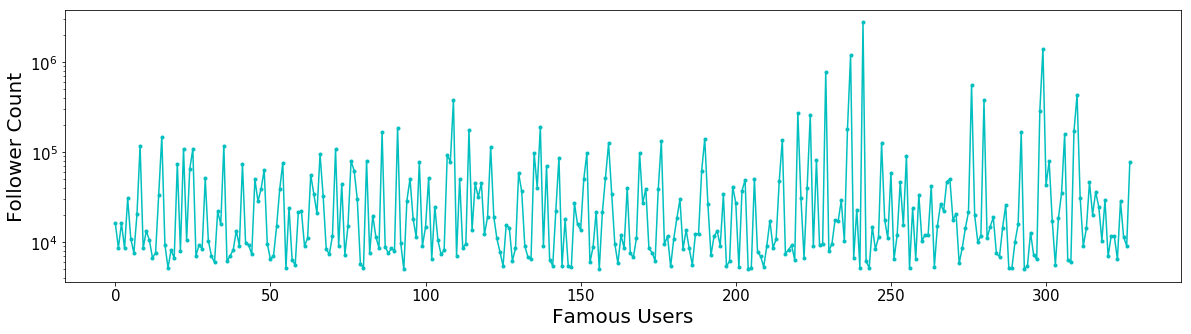

In [6]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (20,5))
plt.yscale('log')
plt.plot(FollowerCounts[:500] , 'co-', markersize = 3)
plt.xlabel('Famous Users', fontsize = 20)
plt.ylabel('Follower Count', fontsize = 20)
plt.rcParams.update({'font.size': 30})

plt.show()

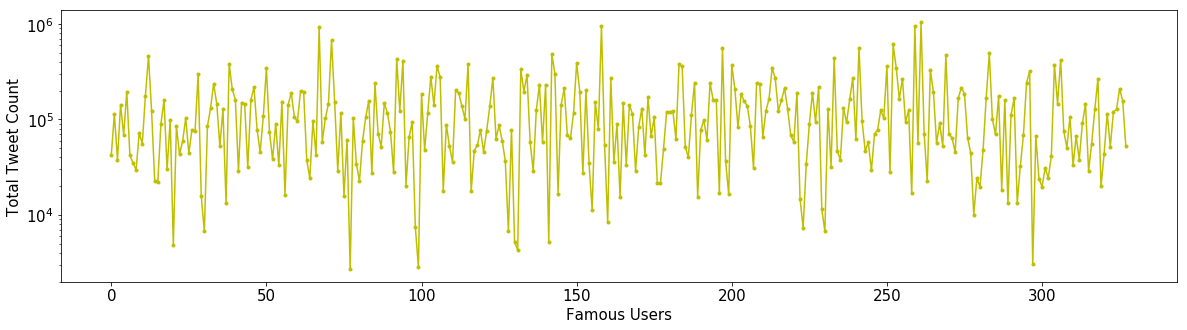

In [10]:
plt.figure(figsize = (20,5))
plt.yscale('log')
plt.plot(TotalTweetCounts[:500] , 'yo-', markersize = 3)
plt.xlabel('Famous Users', fontsize = 15)
plt.ylabel('Total Tweet Count', fontsize = 15)
plt.rcParams.update({'font.size': 15})
plt.show()